We will show the POVM solved by CVXPY and the corresponding quantum circuit.

In [1]:
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
from flow.solve_mix import *
from flow.interface import *
from utils.handy_states import *
from utils.inner_product import inner_products_table
from utils.multiple_wigner import plot_multiple_wigner
from utils.complex_heatmap import ComplexHeatmap
c_heatmap = ComplexHeatmap()

In [4]:
from flow.build_circuits import *

In [5]:
import numpy as np
import pandas as pd
from collections import defaultdict
import logging
from datetime import datetime
from functools import partial

from qiskit.quantum_info import Statevector, DensityMatrix

# Distance
from scipy.stats import entropy, wasserstein_distance
from scipy.spatial.distance import jensenshannon

In [6]:
num_qubits = 5
num_states = 3
state_vec, qutip_states = sv_coh_symm_small(num_qubits=num_qubits)

## for item in state_vec:
##     print(format_complex_array(item.data))

inner_products_table([item.data for item in state_vec])


Inner Product Table:
----------------------------------------------------------------------
|  States   |     State 0      |     State 1      |     State 2      |
--------------------------------------------------------------------
|  State 0  |      1.e+00      |1.446e-01+1.7e-01i|1.446e-01-1.7e-01i|
|  State 1  |1.446e-01-1.7e-01i|      1.e+00      |1.446e-01+1.7e-01i|
|  State 2  |1.446e-01+1.7e-01i|1.446e-01-1.7e-01i|      1.e+00      |
----------------------------------------------------------------------


array([[1.        +0.j        , 0.14455696+0.16997163j,
        0.14455696-0.16997163j],
       [0.14455696-0.16997163j, 1.        +0.j        ,
        0.14455696+0.16997163j],
       [0.14455696+0.16997163j, 0.14455696-0.16997163j,
        1.        +0.j        ]])

In [7]:
dense_mat = [DensityMatrix(_) for _ in state_vec]

problem_symm_states_1 = ProblemSpec(
    num_qubits=num_qubits,
    num_states=num_states,
    seed=33,
    case_id=f"q{num_qubits}_n{num_states}_symm",
    state_type="statevector",
)
problem_symm_states_1.set_states(
    state_type="statevector",
    states=state_vec,
    overwrite=True,
)
print("Is linear indep", problem_symm_states_1.is_lin_indep())
ideal_result = apply_Eldar(problem_spec=problem_symm_states_1)

print(verify_povm_matrix(ideal_result["povm"]))
p_inc_ideal = ideal_result["p_inc"]


Rank = 3
#states = 3
Is linear indep True
<class 'numpy.ndarray'>
shape = (32, 32)
[[0.1242+0.j 0.1392+0.j 0.2018+0.j ... 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.1392+0.j 0.1561+0.j 0.2262+0.j ... 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.2018+0.j 0.2262+0.j 0.3279+0.j ... 0.    +0.j 0.    +0.j 0.    +0.j]
 ...
 [0.    +0.j 0.    +0.j 0.    +0.j ... 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.    +0.j ... 0.    +0.j 0.    +0.j 0.    +0.j]
 [0.    +0.j 0.    +0.j 0.    +0.j ... 0.    +0.j 0.    +0.j 0.    +0.j]]
<class 'numpy.ndarray'>
shape = (32, 32)
[[ 0.1242+0.0000e+00j -0.0696+1.2059e-01j -0.1009-1.7476e-01j ...
   0.    +0.0000e+00j  0.    +0.0000e+00j -0.    +0.0000e+00j]
 [-0.0696-1.2059e-01j  0.1561-3.5964e-18j -0.1131+1.9592e-01j ...
   0.    +0.0000e+00j  0.    +0.0000e+00j  0.    +0.0000e+00j]
 [-0.1009+1.7476e-01j -0.1131-1.9592e-01j  0.3279-3.2100e-18j ...
   0.    +0.0000e+00j -0.    +0.0000e+00j  0.    +0.0000e+00j]
 ...
 [ 0.    +0.0000e+00j  0.    +0.0000e+00

/home/koova22/QSD/notebooks/../utils/multiple_wigner.py:136: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(
/home/koova22/QSD/notebooks/../utils/multiple_wigner.py:159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner Functions of Coherent States'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

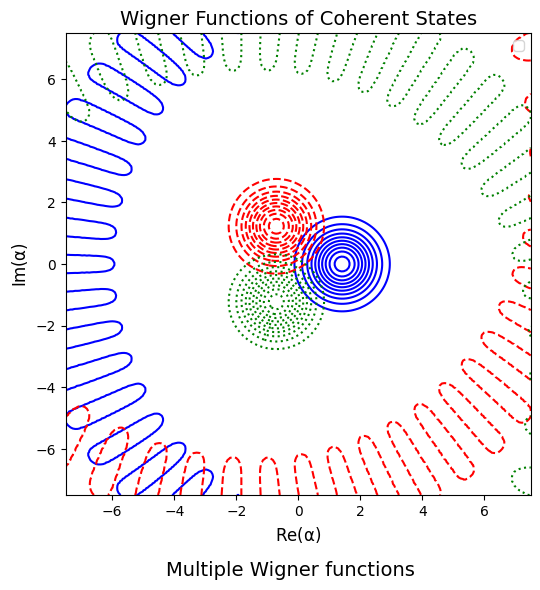

In [8]:
plot_multiple_wigner(
    states=qutip_states,
    projection="2d",
    colors=["blue", "red", "green", "yellow"],
    linestyles=["-", "--", ":", "-"],
    colorbar=True,
    use_filled=False,
    # save_path="coherent_states_wigner_contours.png",
    close_fig=False,
)

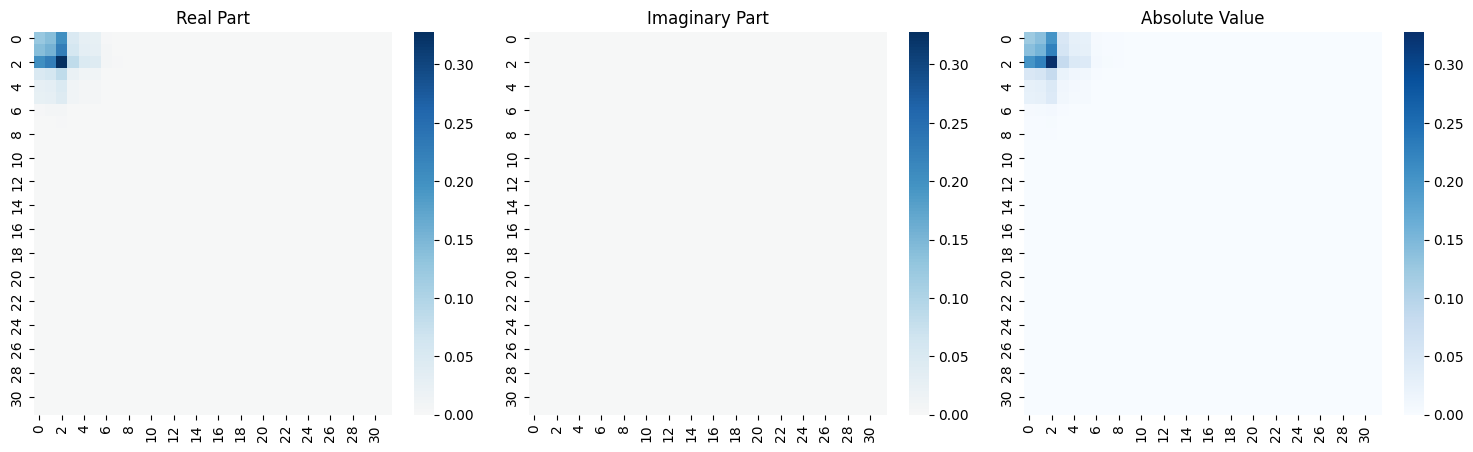

In [9]:
c_heatmap.plot(
    ideal_result["povm"][0],
    annot=False,
    # title=r"Coherent state, N=32, $|\alpha|$=8, $\angle{\alpha}=\pi/4$",
    show_phase=False,
)

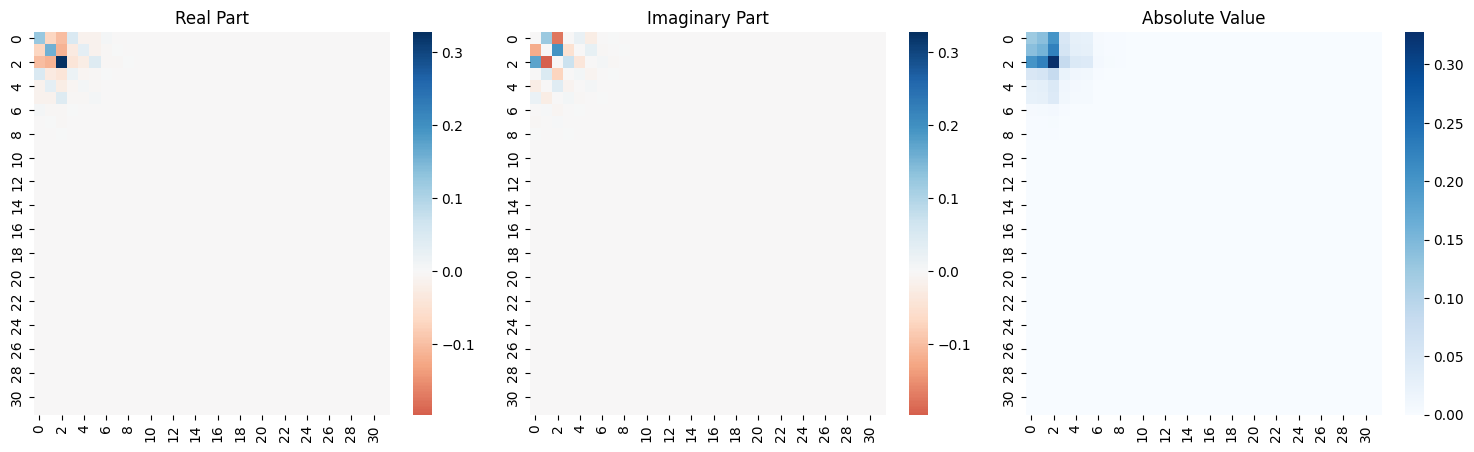

In [10]:
c_heatmap.plot(
    ideal_result["povm"][1],
    annot=False,
    # title=r"Coherent state, N=32, $|\alpha|$=8, $\angle{\alpha}=\pi/4$",
    show_phase=False,
)

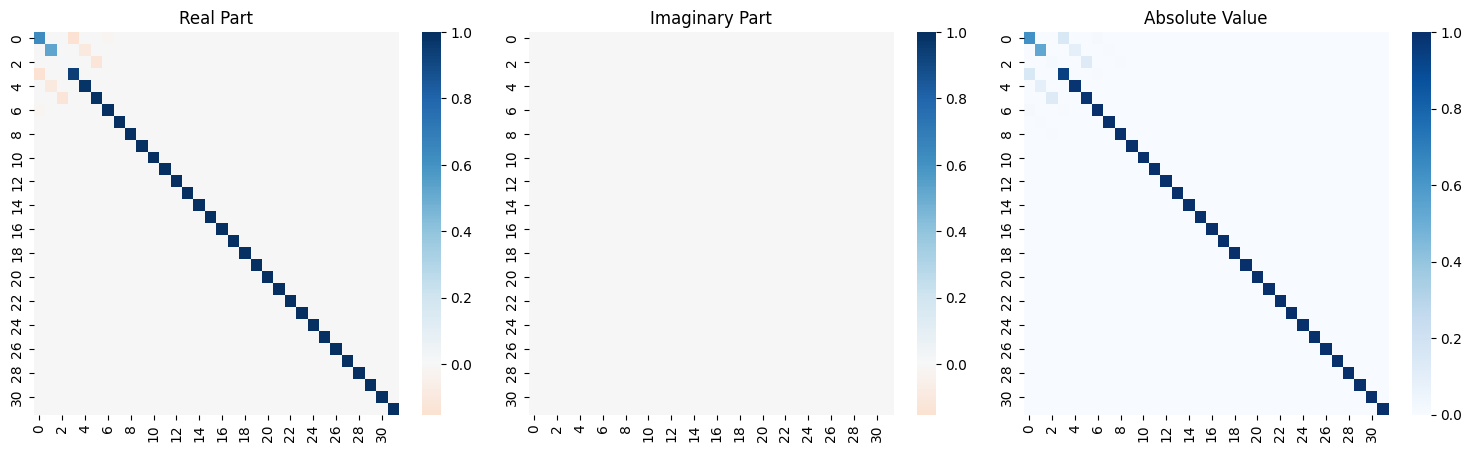

In [11]:
c_heatmap.plot(
    ideal_result["povm"][3],
    annot=False,
    # title=r"Coherent state, N=32, $|\alpha|$=8, $\angle{\alpha}=\pi/4$",
    show_phase=False,
)

In [12]:
obj = POVMCircuit(povm_vectors=ideal_result["povm_vectors"])
obj.num_qubits = 5
obj.num_amps = 2 ** 5
obj.case_id = "coh_q5_n3"
obj.fix()
obj.build_circuit()

identity
[[ 1.+0.j  0.-0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j -0.-0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j -0.+0.j  1.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  1.+0.j]]
identity-diagonal
[1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j
 1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j
 1.+8.8999e-19j 1.-4.8606e-18j 1.+3.2745e-18j 1.-1.7418e-18j
 1.+9.8919e-18j 1.-3.1595e-19j 1.-6.2240e-19j 1.+8.3671e-19j
 1.-9.4130e-20j 1.-1.9063e-17j 1.-1.7193e-17j 1.+1.3075e-18j
 1.+2.7022e-18j 1.+9.6442e-18j 1.-1.2082e-17j 1.+1.7258e-17j
 1.+1.1894e-19j 1.-4.2574e-18j 1.-6.6365e-18j 1.-8.8971e-19j
 1.+9.2867e-18j 1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j
 1.+3.6977e-19j 1.-1.1798e-17j 1.+0.0000e+00j 1.+0.0000e+00j
 1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j 1.+0.0000e+00j
 1.+0.0000e+00j 1.+0.0000e+

In [14]:
qc = QuantumCircuit.from_qasm_file(
    "qc_iso_coh_q5_n3_no_backend.qasm"
)

In [15]:
print(qc.count_ops())
print(qc.depth())

OrderedDict({'u': 5029, 'cx': 4675, 'u1': 3})
9138


In [13]:
noise_levels = [0.1 ** (6 - 0.5 * i) for i in range(10)]
disturbance_states = [
    DensityMatrix(
        ProblemSpec.depolarizing_noise_channel(num_qubits=num_qubits)
    )
    for _ in range(num_states)
]

In [14]:
noise_level = noise_levels[0]
combined_states = [
    (1 - noise_level) * dense_mat[_]
    + noise_level * disturbance_states[_].data
    for _ in range(num_states)
]
problem_symm_states_1.set_states(
    state_type="densitymatrix",
    states=combined_states,
    overwrite=True,
)

noisy_result = apply_Eldar_mix_primal(
    problem_spec=problem_symm_states_1,
    beta=p_inc_ideal,
    is_cvxpy_verbose=False,
)

Result = 0.5610382366398922
CVXPY returns optimal
bitstring_to_target_state
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 3, 97: 3, 98: 3, 99: 3, 100: 3, 101: 3, 102: 3, 103: 3, 104: 3, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 3, 117: 3, 118: 3, 119: 3, 120: 3, 121: 3, 122: 3, 123: 3, 124: 3, 125: 3, 126: 3, 127: 3}
strings_u

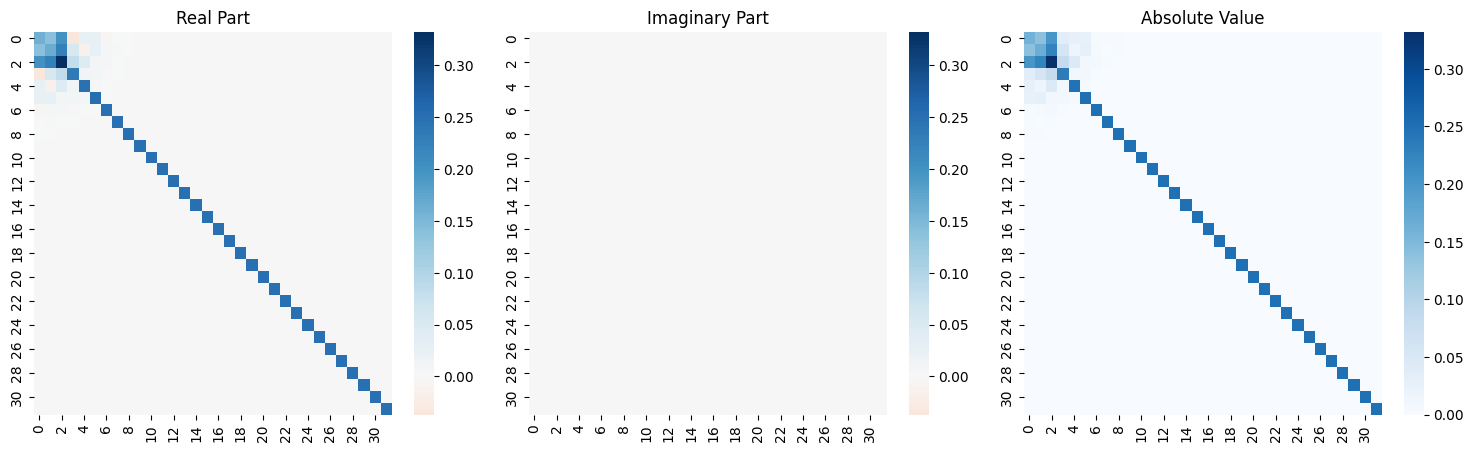

In [20]:
c_heatmap.plot(
    noisy_result["PI_list"][0],
    annot=False,
    # title=r"Coherent state, N=32, $|\alpha|$=8, $\angle{\alpha}=\pi/4$",
    show_phase=False,
)

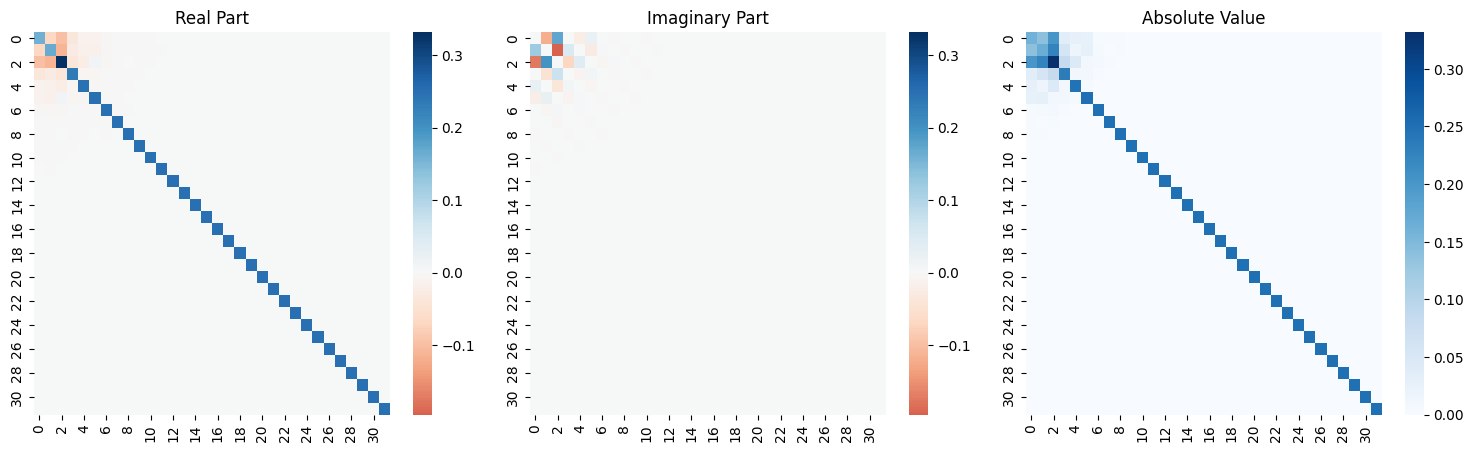

In [21]:
c_heatmap.plot(
    noisy_result["PI_list"][1],
    annot=False,
    # title=r"Coherent state, N=32, $|\alpha|$=8, $\angle{\alpha}=\pi/4$",
    show_phase=False,
)

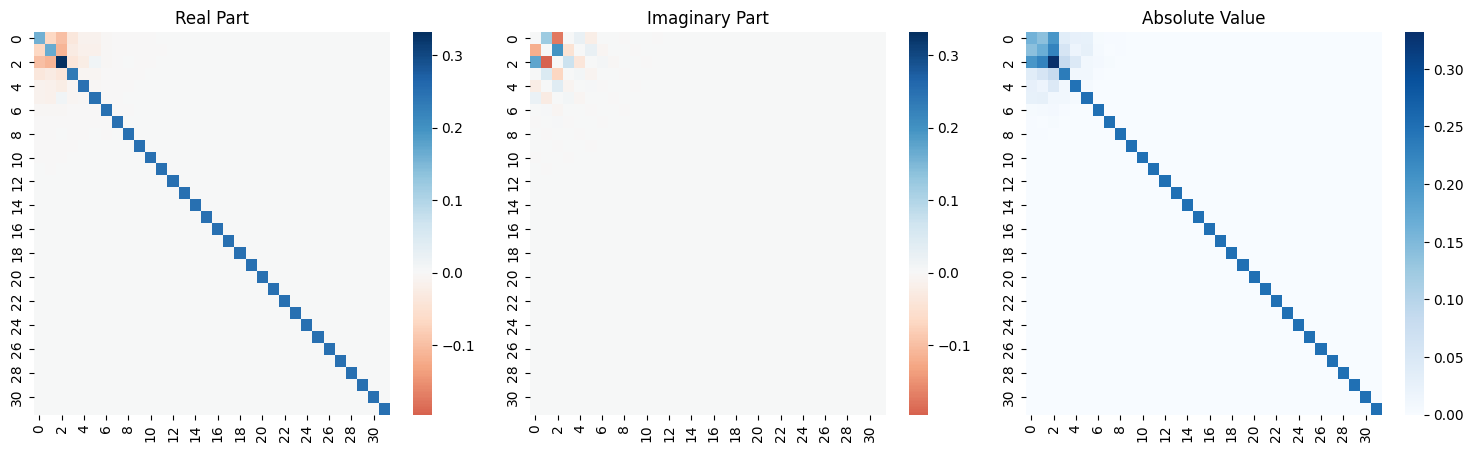

In [23]:
c_heatmap.plot(
    noisy_result["PI_list"][2],
    annot=False,
    # title=r"Coherent state, N=32, $|\alpha|$=8, $\angle{\alpha}=\pi/4$",
    show_phase=False,
)

In [22]:
print(len(noisy_result["PI_list"]))

4


In [ ]:
# TODO Calculate initial values for alpha and beta
mat = calculate_prob_matrix_simple(
    prior_probs=problem_symm_states_1.prior_prob,
    povm=noisy_result["PI_list"],
    states=problem_symm_states_1.states,
    ## bitstring_to_target_state=result["bitstring_to_target_state"],
    ## strings_used=result["strings_used"],
)
alpha_init, beta_init = calculate_errors(mat)
print("alpha_init", alpha_init, flush=True)
print("beta_init", beta_init, flush=True)
print(
    "max(alpha_init + beta_init)",
    max(alpha_init + beta_init),
    flush=True,
)

# cvxpy_problem = gen_crossQD_dpp_problem(problem_spec=problem_symm_states_1)
cvxpy_problem = gen_crossQD_dpp_problem_symm(
    problem_spec=problem_symm_states_1
)


In [ ]:

## TODO Modify below

# I have two different "probability distributions"
# One includes the (small) error probabilities in the conclusive probabilities
# One excludes these probabilities and normalize the rest.
# I think we have to have more than one partial functions
# One for noise_level, one for params?

# noise_levels = [0.1 ** (6 - 0.25 * i) for i in range(10)]
noise_levels = [0.1 ** (6 - 0.5 * i) for i in range(10)]
disturbance_states = [
    DensityMatrix(
        ProblemSpec.depolarizing_noise_channel(num_qubits=num_qubits)
    )
    for _ in range(num_states)
]

for noise_level in noise_levels:
    # Combine these
    # TODO dense_mat_noise = []
    combined_states = [
        (1 - noise_level) * dense_mat[_]
        + noise_level * disturbance_states[_].data
        for _ in range(num_states)
    ]
    problem_symm_states_1.set_states(
        state_type="densitymatrix",
        states=combined_states,
        overwrite=True,
    )

    noisy_result = apply_Eldar_mix_primal(
        problem_spec=problem_symm_states_1,
        beta=p_inc_ideal,
        is_cvxpy_verbose=False,
    )

    # TODO Calculate initial values for alpha and beta
    mat = calculate_prob_matrix_simple(
        prior_probs=problem_symm_states_1.prior_prob,
        povm=noisy_result["PI_list"],
        states=problem_symm_states_1.states,
        ## bitstring_to_target_state=result["bitstring_to_target_state"],
        ## strings_used=result["strings_used"],
    )
    alpha_init, beta_init = calculate_errors(mat)
    print("alpha_init", alpha_init, flush=True)
    print("beta_init", beta_init, flush=True)
    print(
        "max(alpha_init + beta_init)",
        max(alpha_init + beta_init),
        flush=True,
    )

    # cvxpy_problem = gen_crossQD_dpp_problem(problem_spec=problem_symm_states_1)
    cvxpy_problem = gen_crossQD_dpp_problem_symm(
        problem_spec=problem_symm_states_1
    )

    ## bounds = [(0, 1) for _ in range(num_states * 2)]
    ## result = differential_evolution(objective, bounds, seed=42)

    print(datetime.now())

    # Method 1. Grid Search
    # Method 2. Backward propagation
    # grad_descent_param(alpha_init, beta_init, cvxpy_problem)

    # Method 3. Bayesian optimization
    # Define parameter bounds (all floats between 0 and 1)
    # space = [Real(0.0, 1.0 - 1 / num_states, name=f"alpha_{i}") for i in range(num_states)] + [
    #     Real(0.0, 1.0 - 1 / num_states, name=f"beta_{i}") for i in range(num_states)
    # ]

    # Replace gradient descent with AdamW
    data_df, best_tol, best_js_dist = grad_descent_param(
        alpha_init,
        beta_init,
        cvxpy_problem,
        problem_symm_states_1,
        ideal_result["distrib"],
        max_iters=200,
    )
    print(f"Best tol: {best_tol}, Best JS divergence: {best_js_dist}")
